In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

Question 3: \
a.

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
def fetch_mnist():
    # Download MNIST dataset
    X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
    X = X.to_numpy()
    y = y.to_numpy()

    # Randomly sample 7000 images
    np.random.seed(2)
    indices = np.random.choice(len(X), 7000, replace=False)
    X, y = X[indices], y[indices]
    return X, y
X, y = fetch_mnist()
print(X.shape, y.shape)

(7000, 784) (7000,)


b.

In [3]:
idx2class={'0': 'T-shirt/top', '1': 'Trouser', '2': 'Pullover',
           '3': 'Dress', '4': 'Coat', '5': 'Sandal',
           '6': 'Shirt', '7': 'Sneaker', '8': 'Bag', '9': 'Ankle'}

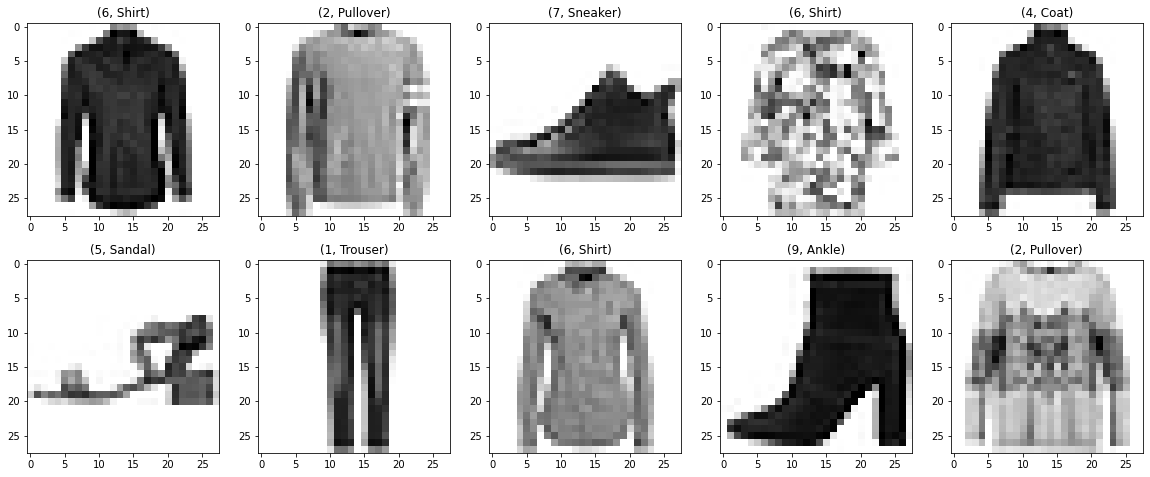

In [4]:
N = 10
H = 2
W = 5

fig, ax = plt.subplots(H, W)
fig.set_size_inches(20, 8)


point_i = 0

for i in range(H):
    for j in range(W):
        ax[i, j].imshow(X[point_i, :].reshape((28, 28)), cmap="binary")
        ax[i, j].set_title(f"({y[point_i]}, {idx2class[y[point_i]]})")
        point_i += 1

        

c.

In [5]:
def cross_validation_error(X, y, model, folds):
    X_k = np.array_split(X, folds)
    y_k = np.array_split(y, folds)
    
#     print(y_k)
    
    train_error = list()
    val_error = list()
    
    for fold_1 in range(folds):
#         print(fold_1)
        X_val_k = X_k[fold_1]
        y_val_k = y_k[fold_1]
        
        X_train_k = np.array([element for fold_2 in range(folds) if fold_2 != fold_1 for element in X_k[fold_2]])
        y_train_k = np.array([element for fold_2 in range(folds) if fold_2 != fold_1 for element in y_k[fold_2]])
        
        model.fit(X_train_k, y_train_k)
        
        train_error.append(model.score(X_train_k, y_train_k))
        val_error.append(model.score(X_val_k, y_val_k))
        
    return (1-(np.array(train_error).mean()), 1-(np.array(val_error).mean()))
    
# folds = 4
# model = SVC(kernel="linear")
# train_error, val_error = cross_validation_error(X_train, y_train, model, folds)



In [6]:
def SVM_results(X_train, y_train, X_test, y_test):
    D = [2, 4, 6, 8]
    G = [0.001, 0.01, 0.1, 1.0, 10]
    folds = 4
    error_dict = dict()
    
    model = SVC(kernel="linear")
    train_error, val_error = cross_validation_error(X_train, y_train, model, folds)
    
    model.fit(X_train, y_train)
    test_error = (model.predict(X_test) != y_test).mean()
    
    error_dict[f"linear_{folds}"] = (train_error, val_error, test_error)
    
    for d in D:
        model = SVC(kernel="poly", degree=d)
        train_error, val_error = cross_validation_error(X_train, y_train, model, folds)

        model.fit(X_train, y_train)
        test_error = (model.predict(X_test) != y_test).mean()

        error_dict[f"poly_{d}_{folds}"] = (train_error, val_error, test_error)
        
    for g in G:
        model = SVC(kernel="rbf", gamma=g)
        train_error, val_error = cross_validation_error(X_train, y_train, model, folds)

        model.fit(X_train, y_train)
        test_error = (model.predict(X_test) != y_test).mean()

        error_dict[f"rbf_{g}_{folds}"] = (train_error, val_error, test_error)
    
    return error_dict


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
errors = SVM_results(X_train, y_train, X_test, y_test)

In [9]:
errors

{'linear_4': (0.0, 0.17809432063046837, 0.18457142857142858),
 'poly_2_4': (0.11492092702316437, 0.1775252865342819, 0.17085714285714285),
 'poly_4_4': (0.11371423111053436, 0.23523965318670703, 0.22285714285714286),
 'poly_6_4': (0.14469827796943557, 0.2754299175227092, 0.2611428571428571),
 'poly_8_4': (0.16869858473084143, 0.30838194044545175, 0.2897142857142857),
 'rbf_0.001_4': (0.0, 0.9114276152638716, 0.8977142857142857),
 'rbf_0.01_4': (0.0, 0.9114276152638716, 0.8982857142857142),
 'rbf_0.1_4': (0.0, 0.9114276152638716, 0.8982857142857142),
 'rbf_1.0_4': (0.0, 0.9114276152638716, 0.8982857142857142),
 'rbf_10_4': (0.0, 0.9114276152638716, 0.8982857142857142)}

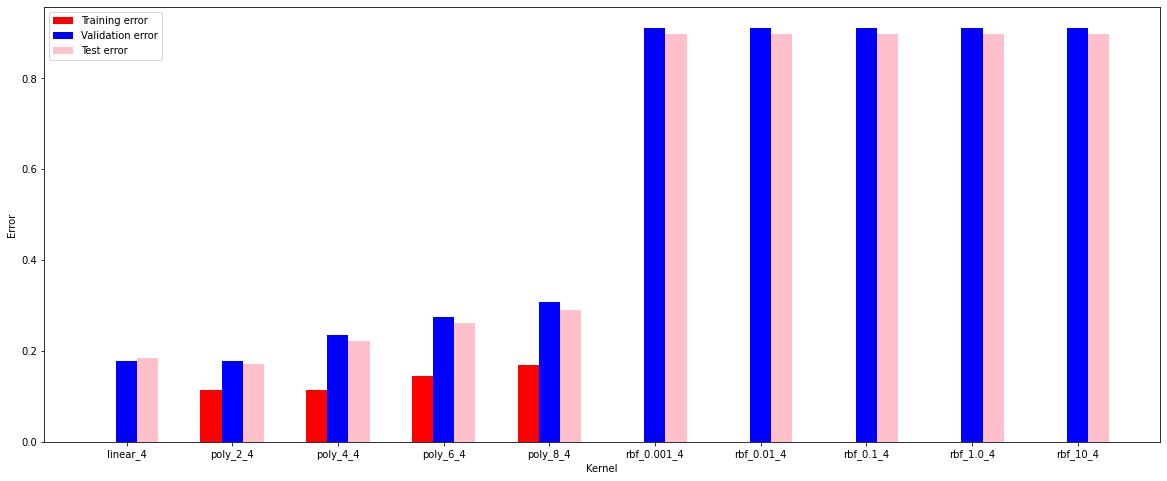

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

width = 0.6

x = np.arange(10)



E = list(zip(*errors.values()))
ax.bar(x - width/3, E[0], width/3, color="red", label="Training error")
ax.bar(x, E[1], width/3, color="blue", label="Validation error")
ax.bar(x + width/3, E[2], width/3, color="pink", label="Test error")



ax.set_xticks(x)
ax.set_xticklabels(errors.keys())
ax.set_xlabel("Kernel")
ax.set_ylabel("Error")

plt.legend()
plt.show()



We see that rbf model has the lowest training error but high validation error which might be caused of overfitting \
And we see that the poly model have relativly low training and validation errors which is the best of the CV method \
The linear and the poly_2 have somewhat the same error on both validation and error sets with slight differences \
so the best model w.r.t the test set is poly_2 then the linear